# Normalized Difference Vegentation Index

In [1]:
# Display the matplotlib plots in the notebook
%matplotlib inline

import xarray as xr
import numpy as np
import datacube

# Supress the warning in a notebook so that they 
# are not displayed when running cells.
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore')

import compounds
import utils

## Datacube Query

**Ingested Area:**
    - Latitude: 4,5
    - Longitude: -70, -69
    - Time: 2018/08/03 - 2018/12/25

In [2]:
dc = datacube.Datacube(app="Query")

xarr = dc.load(
    product="LS8_OLI_LASRC",
    latitude=(4.1,4.2),
    longitude=(-70.0, -69.8), 
    # Time format YYYY-MM-DD
    time=("2018-01-01","2018-12-31"), 
    measurements=['red','nir','pixel_qa']
)

xarr

<xarray.Dataset>
Dimensions:    (latitude: 369, longitude: 742, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2018-11-23T14:54:08 ... 2018-12-25T14:54:05
  * latitude   (latitude) float64 4.2 4.2 4.199 4.199 ... 4.101 4.101 4.1 4.1
  * longitude  (longitude) float64 -70.0 -70.0 -70.0 -70.0 ... -69.8 -69.8 -69.8
Data variables:
    red        (time, latitude, longitude) int16 4008 3059 3355 ... 4646 4281
    nir        (time, latitude, longitude) int16 5526 4707 4791 ... 5909 5605
    pixel_qa   (time, latitude, longitude) int32 480 480 480 480 ... 480 480 480
Attributes:
    crs:      EPSG:4326

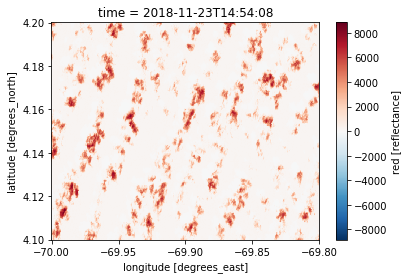

In [3]:
xarr.red[0].plot()
#xarr.red[1].plot()
#xarr.red[2].plot()

## Median Composite

The median composite acomplish tree processing steps:

1. Clouds masking.
2. Normalization (optional).
3. Arithmetic median.

**Parameters:**

* dataset: Raster image dataset
* product: To apply cloud mask accoring with the product.
* bands: Bands for which the median will be computed.
* min_valid: Number of pixels valid o perform the composite, if this condition is not met the pixel will be marked as nodata.

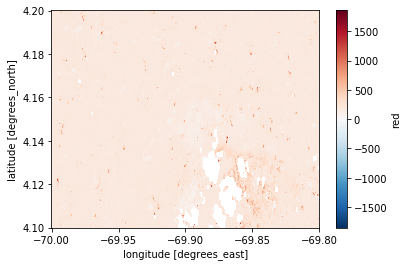

In [4]:
dataset = compounds.median_compound(xarr,product="LS8_OLI_LASRC",bands=['red','nir'],min_valid=1)
dataset.red.plot()

## NDVI

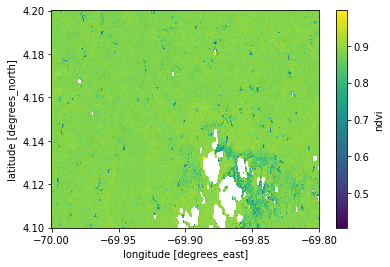

In [5]:
xarr0 = dataset.copy(deep=True)

# Getting red and nir bands
period_red = xarr0["red"].values
period_nir = xarr0["nir"].values

# If any, read or nir is nan, the pixel will be marked as nodata
mask_nan=np.logical_or(np.isnan(period_red), np.isnan(period_nir))
# NDVI computation
period_nvdi = (period_nir-period_red) / (period_nir+period_red)
# Removing pixels marked as nondata
period_nvdi[mask_nan]=np.nan
# clip
period_nvdi[period_nvdi>1]=np.nan
period_nvdi[period_nvdi<-1]=np.nan
# Convert np.array to xarray dataset 
output = utils.get_data_set(period_nvdi,var_name='ndvi',xarr0=xarr0)

output.ndvi.plot()